In [226]:
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, MinMaxScaler
from LEN_Scorer import Scorer
from matplotlib import pyplot as plt

In [227]:
mimicDF = pd.read_csv('../LEN_Test/data/StaticData.csv')
targetDF = mimicDF[['deathperiod']]
mimicDF = mimicDF.drop(columns=['PatientID', 'deathperiod'])

In [228]:
mimicDF.head()

,los,gender,age,comorbidity,sofa,respiration,coagulation,liver,renal,cardiovascular,cns
0,9,1,74.19,7,7,0.0,1.0,NaN,0.0,3.0,3.0
1,2,0,75.00,4,2,NaN,0.0,0.0,1.0,NaN,1.0
2,16,0,51.92,4,2,NaN,0.0,NaN,0.0,NaN,2.0
3,12,0,51.73,-13,4,2.0,2.0,NaN,0.0,NaN,0.0
4,7,0,62.07,0,3,0.0,2.0,NaN,1.0,NaN,0.0


In [229]:
mimicDF.describe()

,los,gender,age,comorbidity,sofa,respiration,coagulation,liver,renal,cardiovascular,cns
count,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,3311.000000,5227.000000,2254.000000,5261.000000,1294.000000,5212.000000
mean,14.668757,0.382554,75.049002,9.801026,4.794185,1.987315,0.674957,0.696983,1.017297,3.238022,0.768611
std,14.101457,0.486057,50.553676,9.671438,2.694694,1.374066,0.892066,1.051290,1.263514,0.706116,1.140061
min,1.000000,0.000000,16.010000,-16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,55.410000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,10.000000,0.000000,68.300000,9.000000,4.000000,2.000000,0.000000,0.000000,1.000000,3.000000,0.000000
75%,18.000000,1.000000,78.525000,16.000000,6.000000,3.000000,1.000000,1.000000,2.000000,4.000000,1.000000
max,202.000000,1.000000,306.880000,47.000000,22.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [230]:
rowsWithNaN = sum(mimicDF.isnull().any(axis=1))
print(f"{mimicDF.shape[0]} rows in df, {rowsWithNaN} containing NaN values")

5262 rows in df, 4778 containing NaN values


In [231]:
for col in mimicDF:
    mimicDF[col] = mimicDF[col].fillna(mimicDF[col].mode()[0])

In [232]:
mimicDF['respiration'].mode()[0]

3.0

In [233]:
mimicDF

,los,gender,age,comorbidity,sofa,respiration,coagulation,liver,renal,cardiovascular,cns
0,9,1,74.19,7,7,0.0,1.0,0.0,0.0,3.0,3.0
1,2,0,75.00,4,2,3.0,0.0,0.0,1.0,3.0,1.0
2,16,0,51.92,4,2,3.0,0.0,0.0,0.0,3.0,2.0
3,12,0,51.73,-13,4,2.0,2.0,0.0,0.0,3.0,0.0
4,7,0,62.07,0,3,0.0,2.0,0.0,1.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5257,120,1,36.61,5,10,3.0,3.0,4.0,0.0,3.0,0.0
5258,13,0,53.90,12,4,3.0,0.0,0.0,0.0,3.0,1.0
5259,4,0,58.93,18,5,3.0,1.0,0.0,4.0,3.0,0.0
5260,16,0,68.98,-4,3,1.0,2.0,0.0,0.0,3.0,0.0


In [234]:
for i in range(len(mimicDF['sofa'])):
    print(mimicDF['sofa'][i])

7
2
2
4
3
7
4
14
8
9
6
5
2
4
2
9
6
3
7
2
3
5
4
6
4
13
2
3
5
4
5
7
4
2
2
2
3
6
2
10
7
4
7
6
7
5
2
10
9
2
6
4
6
4
2
4
3
2
4
4
3
8
3
7
9
4
7
2
12
7
5
4
7
4
10
12
7
3
3
6
5
10
7
3
4
2
6
2
5
6
2
2
7
3
2
10
2
5
9
5
2
8
5
10
3
2
2
3
4
6
2
3
5
9
5
3
2
2
2
4
2
4
2
6
3
7
3
3
5
2
2
3
16
5
2
9
5
4
3
7
11
3
3
4
2
8
5
5
2
4
7
10
8
14
3
9
5
4
5
3
3
3
4
7
4
4
2
7
3
4
12
2
2
2
4
2
7
4
5
5
4
3
3
9
3
3
6
5
4
4
3
5
5
3
2
8
11
8
2
2
7
2
3
3
4
5
4
8
3
6
6
5
2
5
2
7
3
8
11
2
3
9
7
5
4
7
3
2
5
6
2
9
8
2
7
6
3
11
10
3
5
5
8
6
2
2
2
5
6
3
11
3
3
9
6
2
7
8
4
4
2
5
7
3
3
2
3
6
5
2
7
5
3
2
4
2
2
4
4
4
3
4
3
9
6
6
2
9
4
7
4
3
2
9
3
2
4
5
4
3
2
2
8
3
14
11
5
9
18
5
2
2
3
2
4
3
4
3
4
4
2
3
3
11
2
3
3
2
5
2
8
5
2
9
2
2
9
4
5
4
4
3
2
10
3
3
5
4
5
3
4
3
11
4
3
6
9
4
5
7
5
2
3
4
8
7
2
2
3
3
4
3
10
7
4
9
2
11
5
4
3
14
7
12
3
6
3
8
7
2
3
5
8
4
6
4
3
6
8
7
2
3
5
4
6
8
3
4
12
18
2
5
3
12
9
6
6
6
5
4
2
5
4
6
2
2
4
5
2
5
9
2
4
4
5
4
6
14
3
2
4
4
2
5
2
8
4
3
4
7
10
2
4
3
3
9
11
3
4
7
3
7
5
3
8
3
9
3
5
4
3
4
2
4
3
3
4
2
6
5
4
8


In [235]:
mimicDF.describe()

,los,gender,age,comorbidity,sofa,respiration,coagulation,liver,renal,cardiovascular,cns
count,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.00000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000
mean,14.668757,0.382554,75.049002,9.801026,4.794185,2.36279,0.670468,0.298556,1.017104,3.058533,0.761307
std,14.101457,0.486057,50.553676,9.671438,2.694694,1.19465,0.890785,0.769595,1.263472,0.364759,1.137079
min,1.000000,0.000000,16.010000,-16.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,55.410000,2.000000,3.000000,2.00000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,10.000000,0.000000,68.300000,9.000000,4.000000,3.00000,0.000000,0.000000,1.000000,3.000000,0.000000
75%,18.000000,1.000000,78.525000,16.000000,6.000000,3.00000,1.000000,0.000000,2.000000,3.000000,1.000000
max,202.000000,1.000000,306.880000,47.000000,22.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000


In [236]:
rowsWithNaN = sum(mimicDF.isnull().any(axis=1))
print(f"{mimicDF.shape[0]} rows in df, {rowsWithNaN} containing NaN values")

5262 rows in df, 0 containing NaN values


#### Replaced NaN values with average of respective columns

In [237]:
dataNeedingEncodingDF = mimicDF[['los', 'age', 'comorbidity', 'sofa']]

### Fixing high age range

In [238]:
ageWithoutOutliers = dataNeedingEncodingDF['age'][dataNeedingEncodingDF['age'] < 200]

dataNeedingEncodingDF['age'] = dataNeedingEncodingDF['age'].apply(lambda x: x if x < 200 else ageWithoutOutliers.mean())

dataNeedingEncodingDF.describe()

C:\Users\benma\AppData\Local\Temp/ipykernel_9524/4019756561.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNeedingEncodingDF['age'] = dataNeedingEncodingDF['age'].apply(lambda x: x if x < 200 else ageWithoutOutliers.mean())


,los,age,comorbidity,sofa
count,5262.000000,5262.000000,5262.000000,5262.000000
mean,14.668757,64.755010,9.801026,4.794185
std,14.101457,15.389396,9.671438,2.694694
min,1.000000,16.010000,-16.000000,2.000000
25%,6.000000,55.410000,2.000000,3.000000
50%,10.000000,66.165000,9.000000,4.000000
75%,18.000000,76.917500,16.000000,6.000000
max,202.000000,89.000000,47.000000,22.000000


In [239]:
bins = 5

est = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
categorisedDF = pd.DataFrame(data=est.fit_transform(dataNeedingEncodingDF), columns=dataNeedingEncodingDF.columns)

In [240]:
categorisedDF.head()

,los,age,comorbidity,sofa
0,0.0,3.0,1.0,1.0
1,0.0,4.0,1.0,0.0
2,0.0,2.0,1.0,0.0
3,0.0,2.0,0.0,0.0
4,0.0,3.0,1.0,0.0


# Graphically representing the categorisation

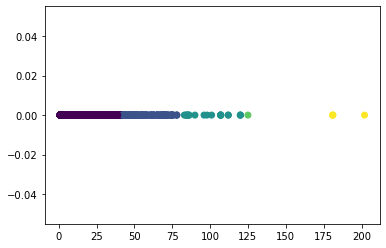

In [241]:
losSeries = dataNeedingEncodingDF['los']

plt.scatter(losSeries, [0]*len(losSeries), c=categorisedDF['los'])
plt.show()

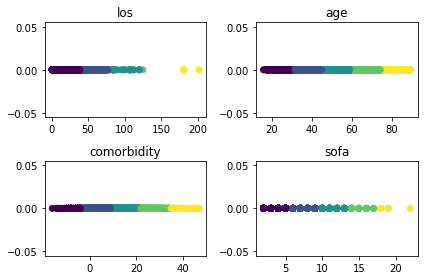

In [242]:
fig = plt.figure()

for idx, col in enumerate(dataNeedingEncodingDF.columns):
    plt.subplot(2, 2, idx+1)
    plt.scatter(dataNeedingEncodingDF[col], [0]*len(dataNeedingEncodingDF[col]), c=categorisedDF[col])
    plt.title(col)

plt.tight_layout()
plt.show()

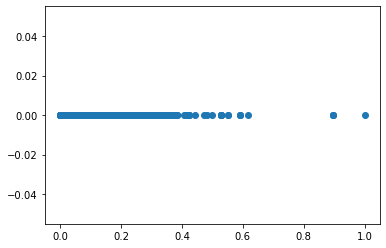

In [243]:
losSeriesNormalised = MinMaxScaler().fit_transform(losSeries.values.reshape(-1, 1))

plt.scatter(losSeriesNormalised, [0]*len(losSeriesNormalised))
plt.show()

In [244]:
pd.set_option('display.max_rows', 1000)

In [245]:
for i in range(len(categorisedDF['sofa'])):
    print(categorisedDF['sofa'][i])

1.0
0.0
0.0
0.0
0.0
1.0
0.0
3.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
2.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
2.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
2.0
1.0
0.0
0.0
1.0
0.0
2.0
2.0
1.0
0.0
0.0
1.0
0.0
2.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
2.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
2.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
2.0
1.0
3.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
2.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
2.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
2.0
2.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0


In [246]:
categorisedDF.describe()

,los,age,comorbidity,sofa
count,5262.000000,5262.000000,5262.000000,5262.000000
mean,0.049601,2.840365,1.554922,0.385405
std,0.256471,1.064888,0.790029,0.643184
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,0.000000
50%,0.000000,3.000000,1.000000,0.000000
75%,0.000000,4.000000,2.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000


In [247]:
categories = {0: 'very_low', 1: 'low', 2: 'medium', 3: 'high', 4: 'very_high'}

encodedDF = categorisedDF.copy()

encodedDF[['respiration','coagulation','liver','renal','cardiovascular','cns']] = mimicDF[['respiration','coagulation','liver','renal','cardiovascular','cns']]

encodedDF

,los,age,comorbidity,sofa,respiration,coagulation,liver,renal,cardiovascular,cns
0,0.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,3.0
1,0.0,4.0,1.0,0.0,3.0,0.0,0.0,1.0,3.0,1.0
2,0.0,2.0,1.0,0.0,3.0,0.0,0.0,0.0,3.0,2.0
3,0.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,3.0,0.0
4,0.0,3.0,1.0,0.0,0.0,2.0,0.0,1.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5257,2.0,1.0,1.0,2.0,3.0,3.0,4.0,0.0,3.0,0.0
5258,0.0,2.0,2.0,0.0,3.0,0.0,0.0,0.0,3.0,1.0
5259,0.0,2.0,2.0,0.0,3.0,1.0,0.0,4.0,3.0,0.0
5260,0.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,3.0,0.0


In [248]:
for col in encodedDF.columns:
    encodedDF[col] = encodedDF[col].map(categories)

encodedDF['gender'] = mimicDF['gender'].map({0:'male', 1:'female'})

encodedDF = pd.get_dummies(encodedDF)

encodedDF.head()

,los_high,los_low,los_medium,los_very_high,los_very_low,age_high,age_low,age_medium,age_very_high,age_very_low,...,cardiovascular_medium,cardiovascular_very_high,cardiovascular_very_low,cns_high,cns_low,cns_medium,cns_very_high,cns_very_low,gender_female,gender_male
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [249]:
encodedDF.describe()

,los_high,los_low,los_medium,los_very_high,los_very_low,age_high,age_low,age_medium,age_very_high,age_very_low,...,cardiovascular_medium,cardiovascular_very_high,cardiovascular_very_low,cns_high,cns_low,cns_medium,cns_very_high,cns_very_low,gender_female,gender_male
count,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,...,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000
mean,0.000190,0.037628,0.004181,0.000760,0.957241,0.354428,0.083048,0.211897,0.317560,0.033067,...,0.037818,0.096921,0.000190,0.075447,0.197453,0.088559,0.040099,0.598442,0.382554,0.617446
std,0.013786,0.190314,0.064531,0.027563,0.202333,0.478385,0.275981,0.408691,0.465571,0.178829,...,0.190775,0.295879,0.013786,0.264136,0.398115,0.284134,0.196210,0.490260,0.486057,0.486057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### TODO Do we want to standardise the data before categorising?

If another point (eg an outlier) is added to the dataset, then this could push the other points away from their original categorisation. Need outlier detection? 

In [250]:
print(encodedDF.columns)

Index(['los_high', 'los_low', 'los_medium', 'los_very_high', 'los_very_low',
       'age_high', 'age_low', 'age_medium', 'age_very_high', 'age_very_low',
       'comorbidity_high', 'comorbidity_low', 'comorbidity_medium',
       'comorbidity_very_high', 'comorbidity_very_low', 'sofa_high',
       'sofa_low', 'sofa_medium', 'sofa_very_high', 'sofa_very_low',
       'respiration_high', 'respiration_low', 'respiration_medium',
       'respiration_very_high', 'respiration_very_low', 'coagulation_high',
       'coagulation_low', 'coagulation_medium', 'coagulation_very_high',
       'coagulation_very_low', 'liver_high', 'liver_low', 'liver_medium',
       'liver_very_high', 'liver_very_low', 'renal_high', 'renal_low',
       'renal_medium', 'renal_very_high', 'renal_very_low',
       'cardiovascular_high', 'cardiovascular_medium',
       'cardiovascular_very_high', 'cardiovascular_very_low', 'cns_high',
       'cns_low', 'cns_medium', 'cns_very_high', 'cns_very_low',
       'gender_female', 

In [251]:
targetDF.describe()

,deathperiod
count,5262.000000
mean,0.896047
std,7.338713
min,-29.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,107.000000


In [252]:
targetDF

,deathperiod
0,-1
1,2
2,-1
3,-1
4,-1
...,...
5257,-1
5258,-1
5259,-1
5260,-1


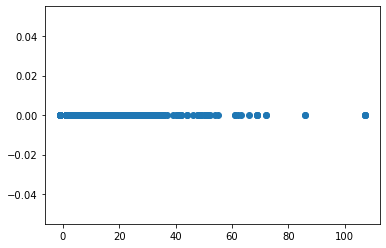

In [282]:
plt.scatter(targetDF['deathperiod'], [0]*len(targetDF['deathperiod']))
plt.show()

In [253]:
targetDF['deathperiod'] = targetDF['deathperiod'].apply(lambda x: x if x > -1 else -1)

In [254]:
targetDiedDF = targetDF[targetDF['deathperiod'] > -1]
targetNoDeathDF = targetDF[targetDF['deathperiod'] == -1].apply(lambda x: x+1.0)

In [255]:
targetDiedDF.shape

(678, 1)

In [256]:
targetNoDeathDF.shape

(4584, 1)

In [296]:
bins = 3

est = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
targetCategorisedDF = pd.DataFrame(data=est.fit_transform(targetDiedDF), columns=['deathperiod'])

targetCategorisedDF['deathperiod'] = targetCategorisedDF['deathperiod'].apply(lambda x: x + 1)

targetCategorisedDF.set_index(targetDiedDF.index, inplace=True)

targetCategorisedDF.head()


,deathperiod
1,1.0
7,1.0
16,1.0
36,1.0
40,1.0


In [297]:
targetNoDeathDF.head()

,deathperiod
0,0.0
2,0.0
3,0.0
4,0.0
5,0.0


In [298]:
combinedTargetDF = pd.concat([targetCategorisedDF, targetNoDeathDF], axis=1)

withDeath = combinedTargetDF.iloc[:,0]
noDeath = combinedTargetDF.iloc[:,1]

newTargetDF = withDeath.fillna(noDeath)

newTargetDF

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
5257    0.0
5258    0.0
5259    0.0
5260    0.0
5261    0.0
Name: deathperiod, Length: 5262, dtype: float64

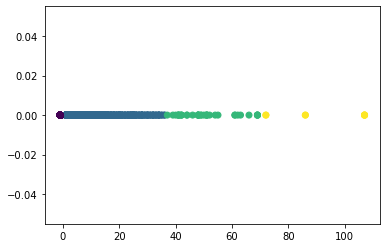

In [299]:
plt.scatter(targetDF, [0]*len(targetDF), c=newTargetDF)
plt.show()

In [300]:
stackedTargetDF = np.stack(newTargetDF)

In [301]:
encodedDF

,los_high,los_low,los_medium,los_very_high,los_very_low,age_high,age_low,age_medium,age_very_high,age_very_low,...,cardiovascular_medium,cardiovascular_very_high,cardiovascular_very_low,cns_high,cns_low,cns_medium,cns_very_high,cns_very_low,gender_female,gender_male
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5257,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
5258,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
5259,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
5260,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [302]:

data = encodedDF.to_numpy()

target = stackedTargetDF


scorer = Scorer(data, target)

scorer.score()

tensor(1.3916, grad_fn=<AddBackward0>)
tensor(1.3563, grad_fn=<AddBackward0>)
tensor(1.3193, grad_fn=<AddBackward0>)
tensor(1.2873, grad_fn=<AddBackward0>)
tensor(1.2493, grad_fn=<AddBackward0>)
tensor(1.2020, grad_fn=<AddBackward0>)
tensor(1.1562, grad_fn=<AddBackward0>)
tensor(1.1130, grad_fn=<AddBackward0>)
tensor(1.0638, grad_fn=<AddBackward0>)
tensor(1.0114, grad_fn=<AddBackward0>)
tensor(0.9552, grad_fn=<AddBackward0>)
tensor(0.8972, grad_fn=<AddBackward0>)
tensor(0.8486, grad_fn=<AddBackward0>)
tensor(0.7970, grad_fn=<AddBackward0>)
tensor(0.7401, grad_fn=<AddBackward0>)
tensor(0.6928, grad_fn=<AddBackward0>)


c:\Users\benma\OneDrive\Kings\Modules\Term 2\Individual Project\LEN Individual Project\Static\LEN_Scorer.py:50: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  clip_grad_norm_(model.parameters(), 5)


tensor(0.6481, grad_fn=<AddBackward0>)
tensor(0.6108, grad_fn=<AddBackward0>)
tensor(0.5809, grad_fn=<AddBackward0>)
tensor(0.5571, grad_fn=<AddBackward0>)
tensor(0.5375, grad_fn=<AddBackward0>)
tensor(0.5180, grad_fn=<AddBackward0>)
tensor(0.5036, grad_fn=<AddBackward0>)
tensor(0.4907, grad_fn=<AddBackward0>)
tensor(0.4803, grad_fn=<AddBackward0>)
tensor(0.4723, grad_fn=<AddBackward0>)
tensor(0.4626, grad_fn=<AddBackward0>)
tensor(0.4529, grad_fn=<AddBackward0>)
tensor(0.4445, grad_fn=<AddBackward0>)
tensor(0.4367, grad_fn=<AddBackward0>)
tensor(0.4312, grad_fn=<AddBackward0>)
tensor(0.4234, grad_fn=<AddBackward0>)
tensor(0.4195, grad_fn=<AddBackward0>)
tensor(0.4149, grad_fn=<AddBackward0>)
tensor(0.4117, grad_fn=<AddBackward0>)
tensor(0.4087, grad_fn=<AddBackward0>)
tensor(0.4078, grad_fn=<AddBackward0>)
tensor(0.4065, grad_fn=<AddBackward0>)
tensor(0.4043, grad_fn=<AddBackward0>)
tensor(0.4036, grad_fn=<AddBackward0>)
tensor(0.4025, grad_fn=<AddBackward0>)
tensor(0.4014, grad_fn=<A